In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [25]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


<IPython.core.display.Javascript object>

0.8625

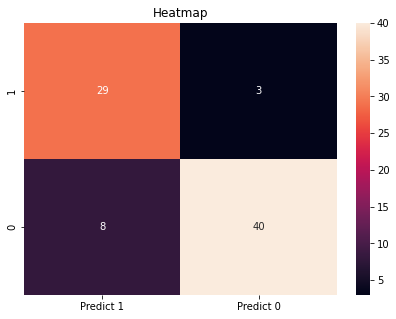

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ['Predict 1','Predict 0']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
plt.title('Heatmap')
accuracy_score(y_test, y_pred)